In [1]:
from util.dataset import *
from util.loss import *
from util.optimizer import *
from util.plot import *
from util.tblog import *
from util.metric import *
from options.trainoptions import *
from model.nets import *
import tensorflow as tf
import tensorboard as tb
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile


# option = TrainOptions()
# args = option.getArgs()
args={'device':'cuda:0','epochs':100,'dataset':'pol','traindsdir':'./datasets','batchsize':8,'lr':0.001,'momentum':0.9,'lrdecaytype':'plateau','lrdecay':True,'log':True, 'logdir':'logs'}
if args['device'] == '':
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
else:
    device = torch.device(args['device'])
train_test_split=0.3
loss_train=[]
loss_val=[]
dataset_size = len(PolDataset('dataset'))
indices=list(range(dataset_size))
split=int(np.floor(dataset_size*train_test_split))
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
train_sampler, test_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(test_indices)
train_loader = torch.utils.data.DataLoader(PolDataset('dataset'), batch_size=args['batchsize'],
                                           sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(PolDataset('dataset'), batch_size=args['batchsize'],
                                                sampler=test_sampler )

dl = getDataloader(dataset=args['dataset'], savedir=args['traindsdir'], batchsize=args['batchsize'], train=True)
net = LinearNet(250)
net.to(device)
criterion = l2norm
optimizer = getOptimizer(net.parameters(), 'adam', {'lr': args['lr'], 'momentum': args['momentum']})
if args['lrdecay']:
    scheduler = getScheduler(optimizer, sch_type=args['lrdecaytype'])
if args['log']:
    writer = TbLogger(args['logdir'], unique_dir=True, restart=True)


running_loss = 0.0
running_acc = 0.0
running_loss_test=0.0
running_acc_all = []
running_loss_all = []

start_epoch = 0
# if args.resume:
#     if args.resumefrom == -1:
#         net, optimizer, start_epoch, start_iteration = load_model(net, optimizer, args.loadpath, latest=True)
#     else:
#         net, optimizer, start_epoch, start_iteration = load_model(net, optimizer, os.path.join(args.loadpath,
#                                                                                                '{0:04d}.pt'.format(
#                                                                                                    args.resumefrom)),
#                                                                   latest=False)
for epoch in range(start_epoch, args['epochs']):
    print('##EPOCH NUMBER## ',epoch)
    for i, data in enumerate(train_loader, 0):
        cat_data,n = data
        net.train()
        optimizer.zero_grad()
        outputs = net(cat_data.to(device))
        loss = criterion(outputs, n.to(device) )
        loss.backward()
        optimizer.step()
        if args['lrdecay']:
            scheduler.step(loss)
            
        loss_train.append(loss.item())
        # print(loss.item())
    with torch.no_grad():
        net.eval()
        for j, data_test in enumerate(test_loader):
            co_data, n= data_test
            outputs_test = net(co_data.to(device))
            loss_test = criterion(outputs_test, n.to(device) )
            loss_val.append(loss_test.item())
        #         break
        #     running_loss += loss.item()
        #     # running_acc_all.append(acc)
        #     running_loss_all.append(loss.item())
            # if args.save:
            #     if (len(dl) * epoch + i) % args.saveevery == args.saveevery - 1:
            #         save_model(net, optimizer, epoch, i, os.path.join('data', 'model'))
            #         print(
            #             'Saving the model in Epoch: {0}, Iteration: {1}, , Accuracy: {2:.4f}%, Loss: {3:.6f}'.format(
            #                 epoch + 1, i + 1,
            #                 np.sum(np.asarray(running_acc_all[-args.printevery:])) / args.printevery * 100,
            #                 np.sum(np.asarray(running_loss_all[-args.printevery:])) / args.printevery))
            #
            # if args.verbose:
            #     if i % args.printevery == args.printevery - 1:
            #         print('Epoch: {0}, Iteration: {1}, Accuracy: {2:.4f}%, Loss: {3:.6f}'.format(
            #             epoch + 1, i + 1,
            #             np.sum(np.asarray(running_acc_all[-args.printevery:])) / args.printevery * 100,
            #             np.sum(np.asarray(running_loss_all[-args.printevery:])) / args.printevery))
            #
            # if args.log:
            #     if i % args.tbsaveevery == args.tbsaveevery - 1:
            #
            #             for i in range(11):
            #                 writer.add_scalar('PCP {}'.format(limbs_name[i]), pcp_metrics_current[i], global_step=epoch * len(dl) + i + 1)
            #             for i in range(14):
            #                 writer.add_scalar('PDJ {}'.format(joints_name[i]), pdj_metrics_current[i], global_step=epoch * len(dl) + i + 1)
            #
            #         writer.add_figure('prediction',
            #                           plot_joints(net, images, bboxes), global_step=epoch * len(dl) + i+1)
            #         writer.add_scalar('Train Loss', running_loss/args.tbsaveevery, global_step=epoch * len(dl) + i+1)
            #         writer.add_scalar('Test Loss', running_loss_test/split, global_step=epoch * len(dl) + i + 1)
            #         running_loss = 0.0
            #         running_loss_test=0.0
            #         running_acc = 0.0
if args['log']:
    writer.close()
print('Training Finished!')



logs\20. September 2020
##EPOCH NUMBER##  0
##EPOCH NUMBER##  1
##EPOCH NUMBER##  2
##EPOCH NUMBER##  3
##EPOCH NUMBER##  4
##EPOCH NUMBER##  5
##EPOCH NUMBER##  6
##EPOCH NUMBER##  7
Epoch   688: reducing learning rate of group 0 to 9.0000e-04.
##EPOCH NUMBER##  8
##EPOCH NUMBER##  9
##EPOCH NUMBER##  10
##EPOCH NUMBER##  11
##EPOCH NUMBER##  12
##EPOCH NUMBER##  13
Epoch  1189: reducing learning rate of group 0 to 8.1000e-04.
##EPOCH NUMBER##  14
##EPOCH NUMBER##  15
##EPOCH NUMBER##  16
##EPOCH NUMBER##  17
##EPOCH NUMBER##  18
##EPOCH NUMBER##  19
Epoch  1690: reducing learning rate of group 0 to 7.2900e-04.
##EPOCH NUMBER##  20
##EPOCH NUMBER##  21
##EPOCH NUMBER##  22
##EPOCH NUMBER##  23
##EPOCH NUMBER##  24
##EPOCH NUMBER##  25
##EPOCH NUMBER##  26
##EPOCH NUMBER##  27
##EPOCH NUMBER##  28
##EPOCH NUMBER##  29
##EPOCH NUMBER##  30
##EPOCH NUMBER##  31
##EPOCH NUMBER##  32
##EPOCH NUMBER##  33
##EPOCH NUMBER##  34
##EPOCH NUMBER##  35
##EPOCH NUMBER##  36
##EPOCH NUMBER##  37
##

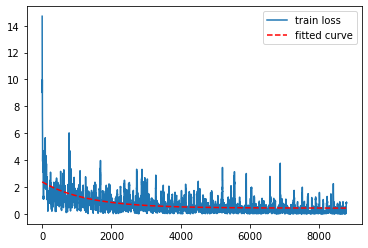

In [16]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

ydata=np.array(moving_average(loss_train,10))
xdata=np.array(list(range((len(ydata)))))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

plt.plot(xdata,ydata)
plt.plot(xdata, func(xdata, *popt), 'r--')
plt.legend(['train loss','fitted curve'])
plt.savefig('train_loss.png')
plt.show()

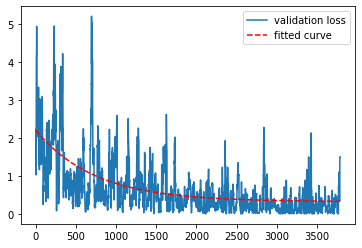

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

ydata=np.array(moving_average(loss_val,10))
xdata=np.array(list(range((len(ydata)))))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

plt.plot(xdata,ydata)
plt.plot(xdata, func(xdata, *popt), 'r--')
plt.legend(['validation loss','fitted curve'])
plt.savefig('val_loss.png')
plt.show()
